# AIML 302 Part 2 - Exercises with Results

## Exercise 1

#### Task 1
##### Import the required packages.

#### Result:

In [1]:
# Helper packages.
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Packages with tools for text processing.
from wordcloud import WordCloud
import nltk
import nltk.data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

#### Task 2 
##### Set `data_dir` to the data directory.

#### Result:

In [2]:
data_dir = "/home/jovyan/iqvia-aiml-302/data"


In [3]:
data_dir = "../../data"

#### Task 3
#####  Load the corpus from `UN_agreement_titles.csv` into a new variable `agreements` .
#####  Print the columns of `agreements`.
#####  Print the first 5 rows and check the output to see if data is loaded correctly.

#### Result:

In [4]:
# Load corpus from a text document (for Mac).
agreements  = pd.read_csv(data_dir + '/UN_agreement_titles.csv')

In [5]:
# Print the columns of `agreements`.
print(agreements.columns)

Index(['title', 'reg_number'], dtype='object')


In [6]:
# Print the first 5 rows.
print(agreements.head())

                                               title  reg_number
0  Agreement concerning arrangements for the hold...           1
1  Declaration recognizing as compulsory the juri...           1
2  Declaration renewing for a further period of f...           1
3  Declaration recognizing as compulsory the juri...          10
4  Convention between the United Kingdom and Fran...          10


#### Task 4
##### Make a series from the dataframe that contains only the `title` column of `agreements` and name it `titles`.
##### Print the first 5 titles. 

#### Result:

In [7]:
# Create a series from the dataframe, name it `titles`.
titles = agreements["title"]
print(titles[:5])

0    Agreement concerning arrangements for the hold...
1    Declaration recognizing as compulsory the juri...
2    Declaration renewing for a further period of f...
3    Declaration recognizing as compulsory the juri...
4    Convention between the United Kingdom and Fran...
Name: title, dtype: object


#### Task 5
##### Tokenize each title in the series `titles` and assign it to `titles_tokenized`.
##### Assign the first tokenized titles to `title_words` and print this out.

##### Note: If you run into look-up error while using word_tokenize, `install all from nltk` using the code below

In [8]:
#nltk.download('all')

#### Result:

In [9]:
# Tokenize each title into a large list of tokenized titles.
titles_tokenized = [word_tokenize(titles[i]) for i in range(0,len(titles))]

# First tokenized title.
titles_words = titles_tokenized[0]
print(titles_words)

['Agreement', 'concerning', 'arrangements', 'for', 'the', 'holding', 'of', 'the', 'fifth', 'session', 'of', 'the', 'Council', 'of', 'the', 'United', 'Nations', 'Relief', 'and', 'Rehabilitation', 'Administration', 'at', 'the', 'Palais', 'des', 'Nations', ',', 'Geneva', ',', 'concluded', 'between', 'the', 'United', 'Nations', ',', 'the', 'League', 'of', 'Nations', 'and', 'the', 'United', 'Nations', 'Relief', 'and', 'Rehabilitation', 'Administration']


#### Task 6
##### Clean the `titles_words` in the following order:
    1. Convert all characters to lower case and assign it to `titles_words`
    2. Remove stop words from `titles_words` and assign it to `titles_words`
    3. Remove punctuation, numbers, and all other symbols that are not letters of the alphabet from `titles_words` and assign it to `titles_words`
    4. Stem words in `titles_words` and assign it to `titles_words`

#### Result:

In [10]:
# 1. Convert to lower case.
titles_words = [word.lower() for word in titles_words]
print(titles_words[:10])

['agreement', 'concerning', 'arrangements', 'for', 'the', 'holding', 'of', 'the', 'fifth', 'session']


In [11]:
# 2. Remove stop words.
# Get common English stop words.
stop_words = stopwords.words('english')
# Remove stop words.
titles_words = [word for word in titles_words if not word in stop_words]
print(titles_words[:10])

['agreement', 'concerning', 'arrangements', 'holding', 'fifth', 'session', 'council', 'united', 'nations', 'relief']


In [12]:
# 3. Remove punctuation and any non-alphabetical characters.
titles_words = [word for word in titles_words if word.isalpha()]
print(titles_words[:10])

['agreement', 'concerning', 'arrangements', 'holding', 'fifth', 'session', 'council', 'united', 'nations', 'relief']


In [13]:
# 4. Stem words.
titles_words = [PorterStemmer().stem(word) for word in titles_words]
print(titles_words[:10])

['agreement', 'concern', 'arrang', 'hold', 'fifth', 'session', 'council', 'unit', 'nation', 'relief']


#### Task 7
##### Create an empty list `titles_clean` whose length is same as `titles_tokenized`.
##### Perform the above steps on the list `titles_tokenized` and also record the length of each title in 'word_counts_per_titles'.
##### Check the first 10 words of the 300th title.

#### Result:

In [14]:
# Create a vector for clean titles.
titles_clean = [None] * len(titles_tokenized)

# Create a vector of word counts for each clean titles.
word_counts_per_titles = [None] * len(titles_tokenized)

# Process words in all documents.
for i in range(len(titles_tokenized)):
    # 1. Convert to lower case.
    titles_clean[i] = [titles.lower() for titles in titles_tokenized[i]]
    
    # 2. Remove stopwords.
    titles_clean[i] = [word for word in titles_clean[i] if not word in stop_words]
    
    # 3. Remove punctuation and any non-alphabetical characters.
    titles_clean[i] = [word for word in titles_clean[i] if word.isalpha()]
    
    # 4. Stem words.
    titles_clean[i] = [PorterStemmer().stem(word) for word in titles_clean[i]]
    
    # Record the word count per titles.
    word_counts_per_titles[i] = len(titles_clean[i])

In [15]:
# First 10 words in 300th title.
# Index will be 299 since the first row has index of 0.
print(titles_clean[299][:10])

['exchang', 'note', 'constitut', 'agreement', 'polici', 'view', 'market', 'meat', 'bueno', 'air']


#### Task 8
##### Print the first 10 rows of `word_counts_per_titles` .
##### Plot a histogram for  `word_counts_per_titles`, set bins to number of unique values in the list.

#### Result:

In [16]:
# Let's take a look at total word counts per title (for the first 10).
print(word_counts_per_titles[:10])

[26, 25, 32, 15, 17, 11, 15, 8, 7, 8]


Text(0, 0.5, 'Frequency')

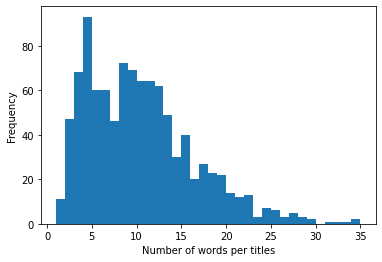

In [17]:
# Build the histogram.
plt.hist(word_counts_per_titles, bins = len(set(word_counts_per_titles)))
plt.xlabel('Number of words per titles')
plt.ylabel('Frequency')

#### Task 9
##### Convert word counts list and snippets list to numpy arrays named `ex_word_counts_array` and  `titles_array` and print the length of  `titles_array`.
##### Find indices of all snippets where there are greater than or equal to 3 words and save it to `valid_titles`. 
##### Print length of `valid_titles`.
##### Subset the `titles_array` to keep only those where there are at least 3 words. 
##### Print length of `titles_array`.
##### Convert it back to a list `titles_clean`.  
##### Print first 5 rows of `titles_clean`.
##### Combine word tokens in each titles into a single string and save the result as a list called `titles_clean_list`. 
##### Print the first 5 titles in `titles_clean_list`.

#### Result:

In [18]:
# Array with length of each titles.
ex_word_counts_array = np.array(word_counts_per_titles)
titles_array = np.array(titles_clean, dtype=object)
print(len(titles_array))

1000


In [19]:
# Find indices of all messages where there are at least 3 words.
valid_titles = np.where(ex_word_counts_array >= 3)[0]
print(len(valid_titles))

942


In [20]:
# Subset the titles array to keep only those where there are at least 3 words.
titles_array = titles_array[valid_titles]
print(len(titles_array))

942


In [21]:
# Convert the array back to a list.
titles_clean = titles_array.tolist()
print(titles_clean[:5])

[['agreement', 'concern', 'arrang', 'hold', 'fifth', 'session', 'council', 'unit', 'nation', 'relief', 'rehabilit', 'administr', 'palai', 'de', 'nation', 'geneva', 'conclud', 'unit', 'nation', 'leagu', 'nation', 'unit', 'nation', 'relief', 'rehabilit', 'administr'], ['declar', 'recogn', 'compulsori', 'jurisdict', 'court', 'conform', 'articl', 'paragraph', 'statut', 'intern', 'court', 'justic', 'legal', 'disput', 'concern', 'interpret', 'applic', 'valid', 'treati', 'relat', 'boundari', 'british', 'hondura', 'london', 'februari'], ['declar', 'renew', 'period', 'five', 'year', 'begin', 'februari', 'declar', 'recogn', 'compulsori', 'jurisdict', 'court', 'conform', 'articl', 'paragraph', 'statut', 'intern', 'court', 'justic', 'legal', 'disput', 'concern', 'interpret', 'applic', 'valid', 'treati', 'relat', 'boundari', 'british', 'hondura', 'london', 'februari'], ['declar', 'recogn', 'compulsori', 'jurisdict', 'court', 'conform', 'articl', 'paragraph', 'statut', 'intern', 'court', 'justic', '

In [22]:
# Join words in each message into a single character string.
titles_clean_list = [' '.join(message) for message in titles_clean]
print(titles_clean_list[:5])

['agreement concern arrang hold fifth session council unit nation relief rehabilit administr palai de nation geneva conclud unit nation leagu nation unit nation relief rehabilit administr', 'declar recogn compulsori jurisdict court conform articl paragraph statut intern court justic legal disput concern interpret applic valid treati relat boundari british hondura london februari', 'declar renew period five year begin februari declar recogn compulsori jurisdict court conform articl paragraph statut intern court justic legal disput concern interpret applic valid treati relat boundari british hondura london februari', 'declar recogn compulsori jurisdict court conform articl paragraph statut intern court justic new york decemb', 'convent unit kingdom franc respect commerci relat franc seychel island sign london april denunci part unit kingdom']


#### Task 10
##### Use the function that takes a list of character strings
##### and a name of an output file and writes it into a txt file we defined in class.

In [23]:
# Define function.
def write_lines(lines, filename):   #<- given lines to write and filename
    joined_lines = '\n'.join(lines) #<- join lines with line breaks
    file = open(ex_out_filename, 'w')  #<- open write only file 
    file.write(joined_lines)        #<- write lines to file
    file.close()                    #<- close connection

##### Save output file name to a variable `ex_out_filename` and call the text file "ex_clean_titles.txt".

#### Result:

In [24]:
# Save file name to a variable.
ex_out_filename = data_dir + "/ex_clean_titles.txt"


In [25]:
# Write sequences to file.
write_lines(titles_clean_list, ex_out_filename)

## Exercise 2

#### Task 1
##### Create a `CountVectorizer()` and save it as `ex_vec`.
##### Create a DTM of the `titles_clean_list` and name it `ex_X`.
##### Convert `ex_X` to an array.
##### Print the  first 20 feature names of `ex_vec`.
##### Convert `ex_X` to a pandas dataframe `ex_DTM` and print the top 5 lines.

#### Result:

In [26]:
ex_vec = CountVectorizer()
ex_X = ex_vec.fit_transform(titles_clean_list)
print(ex_X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
print(ex_vec.get_feature_names_out()[:20])

['aagreement' 'ababa' 'abolit' 'accommod' 'accord' 'account' 'accru'
 'acquir' 'acquisit' 'across' 'act' 'activ' 'addi' 'addit' 'adjoin'
 'administr' 'admiss' 'advanc' 'advisori' 'affect']


In [28]:
# Convert the matrix into a pandas dataframe for easier manipulation.
ex_DTM = pd.DataFrame(ex_X.toarray(), columns = ex_vec.get_feature_names_out())
print(ex_DTM.head())

   aagreement  ababa  abolit  accommod  accord  account  accru  acquir  \
0           0      0       0         0       0        0      0       0   
1           0      0       0         0       0        0      0       0   
2           0      0       0         0       0        0      0       0   
3           0      0       0         0       0        0      0       0   
4           0      0       0         0       0        0      0       0   

   acquisit  across  ...  yarnal  year  york  yosemit  young  youth  yugoslav  \
0         0       0  ...       0     0     0        0      0      0         0   
1         0       0  ...       0     0     0        0      0      0         0   
2         0       0  ...       0     1     0        0      0      0         0   
3         0       0  ...       0     0     1        0      0      0         0   
4         0       0  ...       0     0     0        0      0      0         0   

   yugoslavia  zealand  zone  
0           0        0     0  
1     

#### Task 2
##### Use the convenience function that sorts and looks at first n-entries in the dictionary we defined in class.

In [29]:
def HeadDict(dict_x, n):
    # Get items from the dictionary and sort them by
    # value key in descending (i.e. reverse) order.
    sorted_x = sorted(dict_x.items(),
    reverse = True,
    key = lambda kv: kv[1])
    # Convert sorted dictionary to a list.
    dict_x_list = list(sorted_x)
    # Return the first `n` values from the dictionary only.
    return(dict(dict_x_list[:n]))

#####  Sum the counts of each word in all documents and save the series as a dictionary `ex_corpus_freq_dist`.
##### Print the top 30 words and their counts in `ex_corpus_freq_dist`.

#### Result:

In [30]:
# Sum frequencies of each word in all documents.
ex_DTM.sum(axis = 0).head()

# Save series as a dictonary.
ex_corpus_freq_dist = ex_DTM.sum(axis = 0).to_dict()

# Glance at the top 30 words with highest counts.
print(HeadDict(ex_corpus_freq_dist, 30))

{'agreement': 1085, 'exchang': 386, 'constitut': 334, 'note': 324, 'amend': 256, 'unit': 203, 'concern': 175, 'annex': 167, 'govern': 161, 'loan': 143, 'state': 132, 'project': 119, 'develop': 118, 'relat': 113, 'convent': 104, 'america': 91, 'protocol': 88, 'agricultur': 85, 'assist': 85, 'republ': 80, 'applic': 72, 'sale': 70, 'commod': 69, 'credit': 69, 'extend': 69, 'letter': 65, 'gener': 63, 'air': 60, 'guarante': 60, 'condit': 59}


#### Task 3
##### Plot the frequency distribution of words in `ex_corpus_freq_dist` .

#### Result:

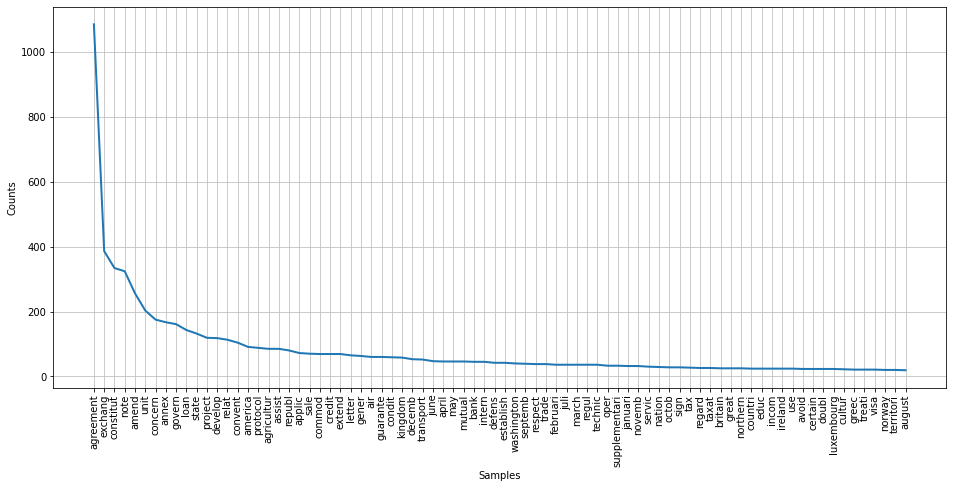

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
# Save as a FreqDist object native to nltk.
ex_corpus_freq_dist = nltk.FreqDist(ex_corpus_freq_dist)

# Plot distribution for the entire corpus.
plt.figure(figsize = (16, 7))
ex_corpus_freq_dist.plot(80)

#### Task 4
##### Create the word cloud of the entire corpus and name it `ex_wordcloud`.
##### Plot the wordcloud and set `figsize` to` (14, 7)`.

#### Result:

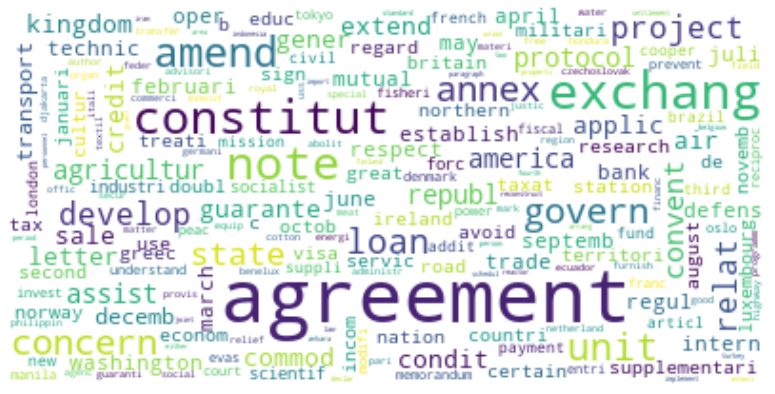

In [32]:
# Word cloud from corpus.
ex_wordcloud = WordCloud(max_font_size = 40, background_color = "white", collocations = False)
ex_wordcloud = ex_wordcloud.generate(' '.join(titles_clean_list))

# Plot the cloud using matplotlib.
plt.figure(figsize = (14, 7))
plt.imshow(ex_wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

#### Task 5
##### Pickle generated data into the `data_dir` for later.
    - Save `ex_X` as `ex_DTM_matrix.sav`
    - Save `ex_DTM` as `ex_DTM.sav`
    - Save `ex_word_counts_array` as `ex_wc_array.sav`
    - Save `titles_clean` as `title_clean.sav`
    - Save titles_clean_list` as `title_clean_list.sav`

In [33]:
pickle.dump(ex_X, open(data_dir + '/ex_DTM_matrix.sav', 'wb'))
pickle.dump(ex_DTM, open(data_dir + '/ex_DTM.sav', 'wb'))
pickle.dump(ex_word_counts_array, open(data_dir + '/ex_wc_array.sav', 'wb'))
pickle.dump(titles_clean, open(data_dir + '/title_clean.sav', 'wb'))
pickle.dump(titles_clean_list, open(data_dir + '/title_clean_list.sav', 'wb'))